In [21]:
from yahoo_finance import Share 
from matplotlib import pyplot as plt
import numpy as np 
import tensorflow as tf 
import random 

In [4]:
%matplotlib inline

## Importing Data 

In [17]:
def get_prices(share_symbol, start_date, end_date, cache_filename='stock_prices.npy'):
    try:
        stock_prices = np.load(cache_filename)
    except IOError:
        share = Share(share_symbol)
        stock_hist = share.get_historical(start_date, end_date)
        stock_prices = [stock_price['Open'] for stock_price in stock_hist]
        np.save(cache_filename, stock_prices)
    return stock_prices

In [18]:
def plot_prices(prices):
    plt.title('Opening stock prices')
    plt.xlabel('day')
    plt.ylabel('price ($)')
    plt.plot(prices) 
    plt.show()

In [19]:
prices = get_prices('MSFT', '1992-07-22', '2016-07-22')

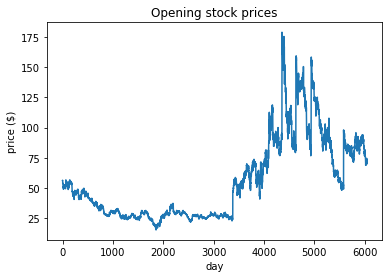

In [20]:
plot_prices(prices)

## DecisionPolicies 

In [23]:
class DecisionPolicy:
    
    def __init__(self):
        pass
    
    def select_action(self, current_state, step):
        pass 
    
    def update_q(self, state, action, reward, next_state):
        pass 

In [24]:
class RandomDecisionPolicy(DecisionPolicy):
    def __init__(self, actions):
        DecisionPolicy.__init__(self)
        self.actions = actions 
        
    def select_action(self, current_state, step):
        action = self.actions[random.randint(0, len(self.actions) - 1)]
        return action 

In [33]:
class QLearningDecisionPolicy(DecisionPolicy):
    
    def __init__(self, actions):
        DecisionPolicy.__init__(self, input_dim)
        
        self.actions = actions         
        self.epsilon = 0.9 
        self.gamma = 0.01         
        
        self.init_variables(input_dim)
        
    def init_variables(self, input_dim):
        output_dim = len(actions)
        h1_dim = 100 
        
        self.x = tf.placeholder(tf.float32, [None, input_dim], name='x')
        self.y = tf.placeholder(tf.float32, [None, output_dim], name='y')
        
        W1 = tf.Variable(tf.random_normal([input_dim, h1_dim]))
        b1 = tf.Variable(tf.constant(0.1, shape=[h1_dim]))
        h1 = tf.nn.relu(tf.matmul(self.x, W1) + b)
        
        W2 = tf.Variable(tf.random_normal([h1_dim, output_dim]))
        b2 = tf.Variable(tf.constant(0.1, shape=[output_dim]))        
        self.q = tt.nn.relu(tf.matmul(h1, W2) + b2)
        
        loss = tf.square(self.y - self.q)
        self.train_op = tf.train.AdagradOptimizer(0.01).minimize(loss)
        self.sess = tf.Session()
        self.sess.run(tf.initialize_all_variables())
        
    def select_action(self, current_state, step):
        threshold = min(self.epsilon, step/1000)
        if random.random() < threshold:
            # exploit 
            action_q_vals = self.sess.run(self.q, feed_dict={self.x : current_state})
            action_idx = np.argmax(action_q_vals)
            action = self.actions[action_idx]
        else:
            # explore 
            action = self.actions[random.randint(0, len(self.actions)-1)]
        return action 
    
    def update_q(self, state, action, reward, next_state):
        action_q_vals = self.sess.run(self.q, feed_dict={self.x:state})
        next_action_q_vals = self.sess.run(self.q, feed_dict={self.x:next_state})
        
        next_action_idx = np.argmax(next_action_q_vals)
        action_q_vals[0, next_action_idx] = reward + self.gamma * next_action_q_vals[0, next_action_idx]
        action_q_vals = np.squeeze(np.asarray(actoin_q_vals))
        self.sess.run(self.train_op, feed_dict={self.x : state, self.y:action_q_vals})

## Simulation 

In [31]:
def run_simulation(policy, initial_budget, initial_num_stocks, prices, hist, debug=False):
    budget = initial_budget
    num_stocks = initial_num_stocks
    share_value = 0 
    transitions = list()
    
    for i in range(len(prices) - hist - 1):
        if i % 100 == 0:
            print("progress {:.2f}%".format(float(100*i) / (len(prices) - hist - 1)))
            
        current_state = np.asmatrix(np.hstack((prices[i:i+hist], budget, num_stocks)))
        current_portfolio = budget + num_stocks * share_value
        action = policy.select_action(current_state, i)
        share_value = float(prices[i + hist + 1])
            
        if action == 'Buy' and budget >= share_value:
            budget -= share_value
            num_stocks += 1
        elif action == 'Sell' and num_stocks > 0:
            budget += share_value
            num_stocks -= 1
        else:
            action = 'Hold'
                
        new_portfolio = budget + num_stocks * share_value
            
        if debug:
            print("${}\t{} shares".format(budget, num_stocks))
                
    return new_portfolio

In [28]:
def run_simulations(policy, budget, num_stocks, prices, hist):
    num_tries = 10 
    final_portfolios = list() 
    for i in range(num_tries):
        final_portfolio = run_simulation(policy, budget, num_stocks, prices, hist)
        final_portfolios.append(final_portfolio)
    avg, std = np.mean(final_portfolios), np.std(final_portfolios)
    return avg, std 
    

## Tests

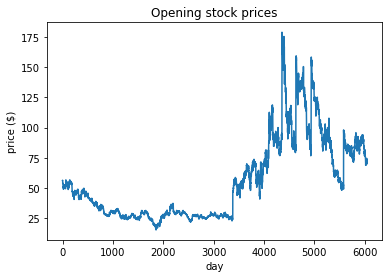

progress 0.00%
progress 1.71%
progress 3.42%
progress 5.13%
progress 6.84%
progress 8.55%
progress 10.26%
progress 11.97%
progress 13.68%
progress 15.40%
progress 17.11%
progress 18.82%
progress 20.53%
progress 22.24%
progress 23.95%
progress 25.66%
progress 27.37%
progress 29.08%
progress 30.79%
progress 32.50%
progress 34.21%
progress 35.92%
progress 37.63%
progress 39.34%
progress 41.05%
progress 42.76%
progress 44.47%
progress 46.19%
progress 47.90%
progress 49.61%
progress 51.32%
progress 53.03%
progress 54.74%
progress 56.45%
progress 58.16%
progress 59.87%
progress 61.58%
progress 63.29%
progress 65.00%
progress 66.71%
progress 68.42%
progress 70.13%
progress 71.84%
progress 73.55%
progress 75.27%
progress 76.98%
progress 78.69%
progress 80.40%
progress 82.11%
progress 83.82%
progress 85.53%
progress 87.24%
progress 88.95%
progress 90.66%
progress 92.37%
progress 94.08%
progress 95.79%
progress 97.50%
progress 99.21%
progress 0.00%
progress 1.71%
progress 3.42%
progress 5.13%
pr

In [29]:
prices = get_prices('MSFT', '1992-07-22', '2016-07-22')
plot_prices(prices)
actions = ['Buy', 'Sell', 'Hold']
hist = 200 
policy = RandomDecisionPolicy(actions)
budget = 1000.0 
num_stocks = 0 
avg, std = run_simulations(policy, budget, num_stocks, prices, hist)
print("avg = {}, std = {}".format(avg, std))